In [1]:
import os
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [2]:
import sqlite3

In [3]:
import seaborn as sns

In [4]:
col_of_interest = [
'annual_inc',       'annual_inc_joint', 'application_type',
'delinq_2yrs',      'desc',             'dti',
'dti_joint',        'earliest_cr_line', 'emp_length',
'emp_title',        'funded_amnt',      'grade',
'home_ownership',   'installment',      'int_rate',
'loan_amnt',        'loan_status',      'mths_since_last_delinq',
'open_acc',         'out_prncp',        'purpose',
'revol_bal',        'sub_grade',        'term',
'total_acc',        'total_rec_late_fee','total_rec_prncp']

In [5]:
query = "select {} from loan;".format(','.join(col_of_interest))
query

'select annual_inc,annual_inc_joint,application_type,delinq_2yrs,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,grade,home_ownership,installment,int_rate,loan_amnt,loan_status,mths_since_last_delinq,open_acc,out_prncp,purpose,revol_bal,sub_grade,term,total_acc,total_rec_late_fee,total_rec_prncp from loan;'

In [6]:
loantable_connection = sqlite3.connect('../assets/lending-club-loan-data/database.sqlite')

In [7]:
loandf = pd.read_sql(query,loantable_connection)

In [8]:
loantable_connection.close()

In [9]:
loandf.describe()

annual_inc  annual_inc_joint    delinq_2yrs           dti  \
count  8.873780e+05        511.000000  887353.000000  887382.00000   
mean   7.502761e+04     109981.011585       0.314445      18.15702   
std    6.469823e+04      52730.379847       0.862247      17.19060   
min    0.000000e+00      17950.000000       0.000000       0.00000   
25%    4.500000e+04      76032.500000       0.000000      11.91000   
50%    6.500000e+04     101771.000000       0.000000      17.65000   
75%    9.000000e+04     132800.000000       0.000000      23.95000   
max    9.500000e+06     500000.000000      39.000000    9999.00000   

        dti_joint    funded_amnt    installment      loan_amnt  \
count  509.000000  887382.000000  887382.000000  887382.000000   
mean    18.310118   14741.893147     436.717647   14755.280082   
std      7.169233    8429.898507     244.186619    8435.456408   
min      3.000000     500.000000      15.670000     500.000000   
25%     13.200000    8000.000000     260.710000    8000.000000   
50%     17.610000   13000.000000     382.550000   13000.000000   
75%     22.650000   20000.000000     572.600000   20000.000000   
max     43.860000   35000.000000    1445.460000   35000.000000   

       mths_since_last_delinq       open_acc      out_prncp     revol_bal  \
count           433069.000000  887353.000000  887382.000000  8.873820e+05   
mean                34.063697      11.548471    8403.142705  1.692076e+04   
std                 21.884941       5.317310    8493.466149  2.242676e+04   
min                  0.000000       0.000000       0.000000  0.000000e+00   
25%                 15.000000       8.000000       0.000000  6.443000e+03   
50%                 31.000000      11.000000    6458.425000  1.187500e+04   
75%                 50.000000      14.000000   13659.350000  2.082900e+04   
max                188.000000      90.000000   49372.860000  2.904836e+06   

           total_acc  total_rec_late_fee  total_rec_prncp  
count  887353.000000       887382.000000    887382.000000  
mean       25.268032            0.396690      5757.706058  
std        11.840553            4.087818      6625.433555  
min         1.000000            0.000000         0.000000  
25%        17.000000            0.000000      1200.570000  
50%        24.000000            0.000000      3215.320000  
75%        32.000000            0.000000      8000.000000  
max       169.000000          358.680000     35000.030000

In [10]:
loandf.columns

Index(['annual_inc', 'annual_inc_joint', 'application_type', 'delinq_2yrs',
       'desc', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length',
       'emp_title', 'funded_amnt', 'grade', 'home_ownership', 'installment',
       'int_rate', 'loan_amnt', 'loan_status', 'mths_since_last_delinq',
       'open_acc', 'out_prncp', 'purpose', 'revol_bal', 'sub_grade', 'term',
       'total_acc', 'total_rec_late_fee', 'total_rec_prncp'],
      dtype='object')

In [11]:
loandf['int_rate'] = loandf.int_rate.str.strip()

In [12]:
loandf['interest_rate'] = loandf.int_rate.str.strip('%')

0     5000.0
1     2500.0
2     2400.0
3    10000.0
4     3000.0
Name: loan_amnt, dtype: float64


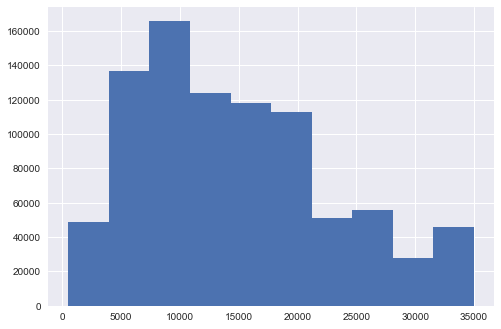

In [11]:
print(loandf['loan_amnt'].head())
loandf['loan_amnt'].hist()

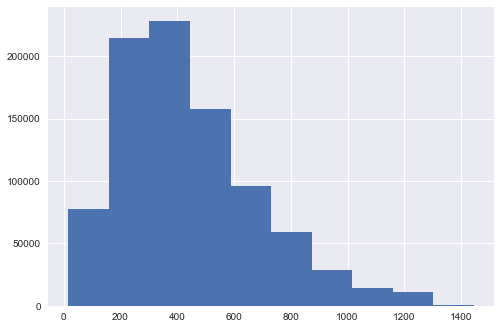

In [12]:
loandf['installment'].hist()

In [13]:
loandf['annual_inc'].describe()

count    8.873780e+05
mean     7.502761e+04
std      6.469823e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

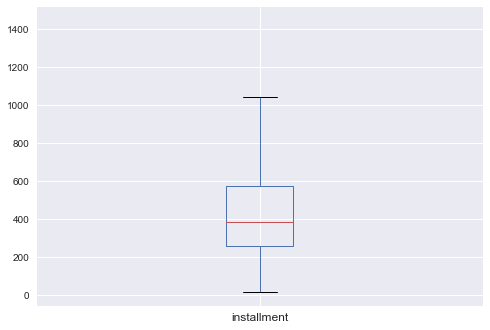

In [14]:
loandf.boxplot('installment')

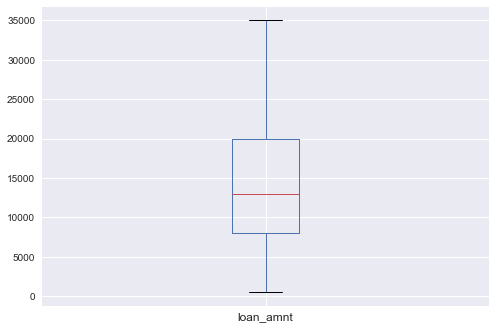

In [15]:
loandf.boxplot('loan_amnt')

In [16]:
print(loandf['int_rate'].head(10))
loandf['int_rate'].describe()

0     10.65%
1     15.27%
2     15.96%
3     13.49%
4     12.69%
5      7.90%
6     15.96%
7     18.64%
8     21.28%
9     12.69%
Name: int_rate, dtype: object


count      887382
unique        542
top        10.99%
freq        34624
Name: int_rate, dtype: object

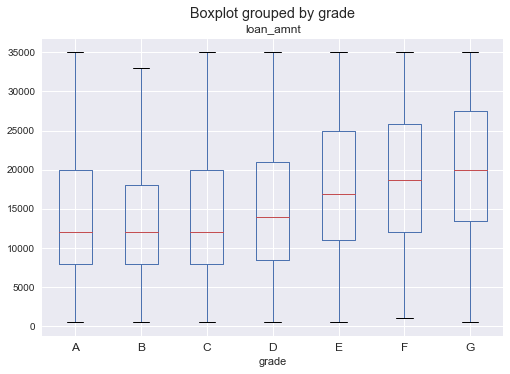

In [17]:
loandf.boxplot(column='loan_amnt', by ='grade')

In [18]:
loandf.dtypes

annual_inc                float64
annual_inc_joint          float64
application_type           object
delinq_2yrs               float64
desc                       object
dti                       float64
dti_joint                 float64
earliest_cr_line           object
emp_length                 object
emp_title                  object
funded_amnt               float64
grade                      object
home_ownership             object
installment               float64
int_rate                   object
loan_amnt                 float64
loan_status                object
mths_since_last_delinq    float64
open_acc                  float64
out_prncp                 float64
purpose                    object
revol_bal                 float64
sub_grade                  object
term                       object
total_acc                 float64
total_rec_late_fee        float64
total_rec_prncp           float64
dtype: object

In [12]:
loandf['interest_rate'].unique()[:20]

array(['10.65', '15.27', '15.96', '13.49', '12.69', '7.90', '18.64',
       '21.28', '14.65', '9.91', '16.29', '6.03', '11.71', '12.42',
       '14.27', '16.77', '7.51', '8.90', '18.25', '6.62'], dtype=object)

In [13]:
loandf.interest_rate = pd.to_numeric(loandf['interest_rate'])

In [14]:
loandf['interest_rate'].unique()[:20]

array([ 10.65,  15.27,  15.96,  13.49,  12.69,   7.9 ,  18.64,  21.28,
        14.65,   9.91,  16.29,   6.03,  11.71,  12.42,  14.27,  16.77,
         7.51,   8.9 ,  18.25,   6.62])

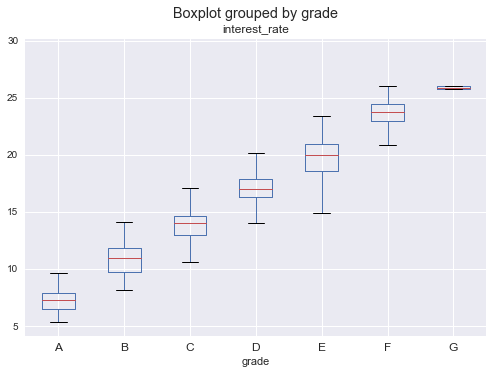

In [41]:
loandf.boxplot(column='interest_rate', by ='grade')

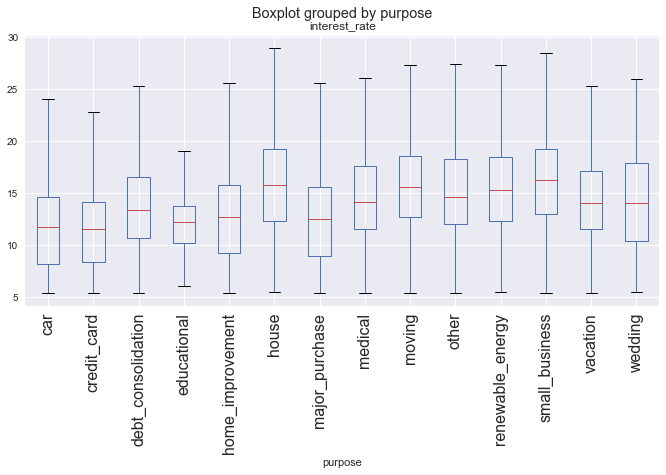

In [31]:
loandf.boxplot(column='interest_rate', by ='purpose', rot=90, figsize=(11,5) , fontsize=16)

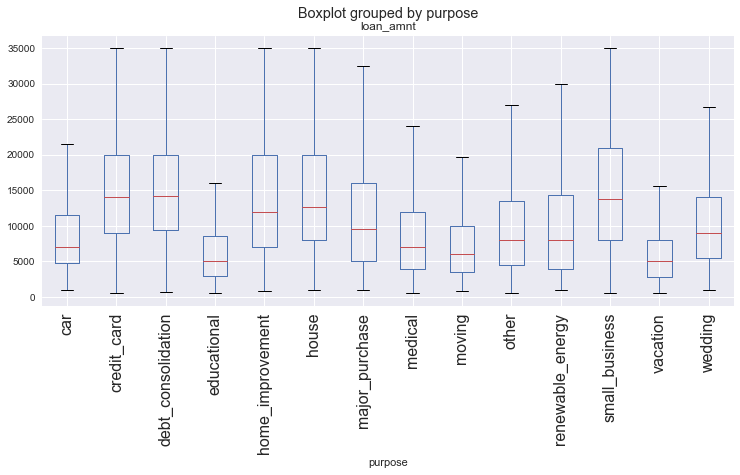

In [59]:
loandf.boxplot(column='loan_amnt', by ='purpose',rot=90, figsize=(12,5) , fontsize=16)

In [32]:
print(loandf.emp_length.unique())
print(loandf.home_ownership.unique())


['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' 'n/a' None]
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' None 'ANY']


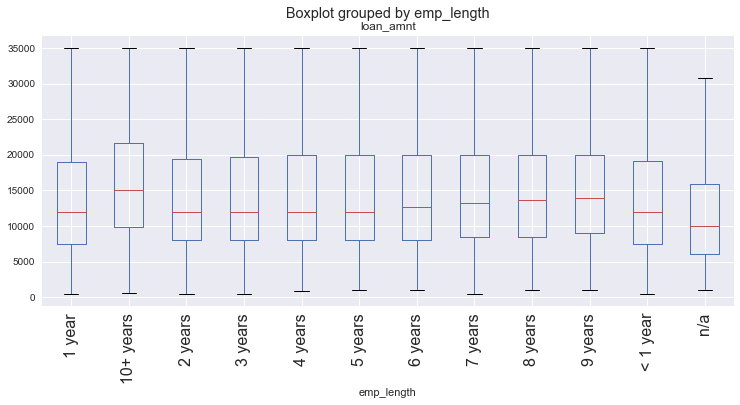

In [34]:
loandf.boxplot(column='loan_amnt', by ='emp_length',rot=90, figsize=(12,5) , fontsize=16)

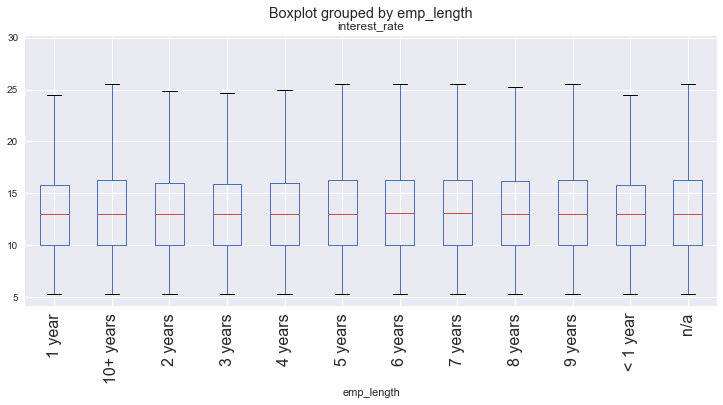

In [35]:
loandf.boxplot(column='interest_rate', by ='emp_length',rot=90, figsize=(12,5) , fontsize=16)

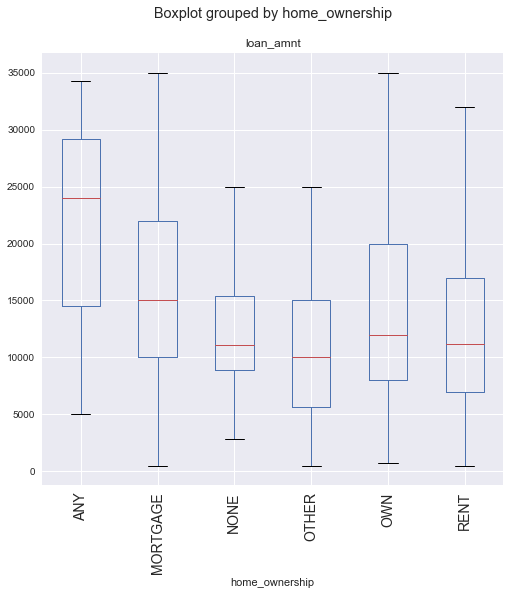

In [40]:
loandf.boxplot(column='loan_amnt', by ='home_ownership',rot=90, figsize=(8,8) , fontsize=14)

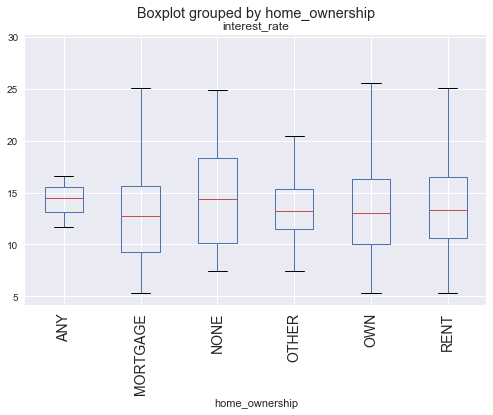

In [41]:
loandf.boxplot(column='interest_rate', by ='home_ownership',rot=90, figsize=(8,5) , fontsize=14)

In [42]:
data_dictionary = pd.read_excel("../assets/lending-club-loan-data/LCDataDictionary.xlsx")
data_dictionary

LoanStatNew  \
0                   addr_state   
1                   annual_inc   
2             annual_inc_joint   
3             application_type   
4      collection_recovery_fee   
5   collections_12_mths_ex_med   
6                  delinq_2yrs   
7                         desc   
8                          dti   
9                    dti_joint   
10            earliest_cr_line   
11                  emp_length   
12                   emp_title   
13             fico_range_high   
14              fico_range_low   
15                 funded_amnt   
16             funded_amnt_inv   
17                       grade   
18              home_ownership   
19                          id   
20         initial_list_status   
21              inq_last_6mths   
22                 installment   
23                    int_rate   
24                    is_inc_v   
25                     issue_d   
26          last_credit_pull_d   
27        last_fico_range_high   
28         last_fico_range_low   
29             last_pymnt_amnt   
..                         ...   
50                       title   
51                   total_acc   
52                 total_pymnt   
53             total_pymnt_inv   
54               total_rec_int   
55          total_rec_late_fee   
56             total_rec_prncp   
57                         url   
58       verified_status_joint   
59                    zip_code   
60                 open_acc_6m   
61                  open_il_6m   
62                 open_il_12m   
63                 open_il_24m   
64          mths_since_rcnt_il   
65                total_bal_il   
66                     il_util   
67                 open_rv_12m   
68                 open_rv_24m   
69                  max_bal_bc   
70                    all_util   
71          total_rev_hi_lim     
72                      inq_fi   
73                 total_cu_tl   
74                inq_last_12m   
75              acc_now_delinq   
76                tot_coll_amt   
77                 tot_cur_bal   
78                         NaN   
79                         NaN   

                                          Description  
0   The state provided by the borrower in the loan...  
1   The self-reported annual income provided by th...  
2   The combined self-reported annual income provi...  
3   Indicates whether the loan is an individual ap...  
4                      post charge off collection fee  
5   Number of collections in 12 months excluding m...  
6   The number of 30+ days past-due incidences of ...  
7           Loan description provided by the borrower  
8   A ratio calculated using the borrower’s total ...  
9   A ratio calculated using the co-borrowers' tot...  
10  The month the borrower's earliest reported cre...  
11  Employment length in years. Possible values ar...  
12  The job title supplied by the Borrower when ap...  
13  The upper boundary range the borrower’s FICO a...  
14  The lower boundary range the borrower’s FICO a...  
15  The total amount committed to that loan at tha...  
16  The total amount committed by investors for th...  
17                             LC assigned loan grade  
18  The home ownership status provided by the borr...  
19      A unique LC assigned ID for the loan listing.  
20  The initial listing status of the loan. Possib...  
21  The number of inquiries in past 6 months (excl...  
22  The monthly payment owed by the borrower if th...  
23                          Interest Rate on the loan  
24  Indicates if income was verified by LC, not ve...  
25                The month which the loan was funded  
26  The most recent month LC pulled credit for thi...  
27  The upper boundary range the borrower’s last F...  
28  The lower boundary range the borrower’s last F...  
29                 Last total payment amount received  
..                                                ...  
50            The loan title provided by the borrower  
51  The total number of credit lines currently in ...  
52  Pa

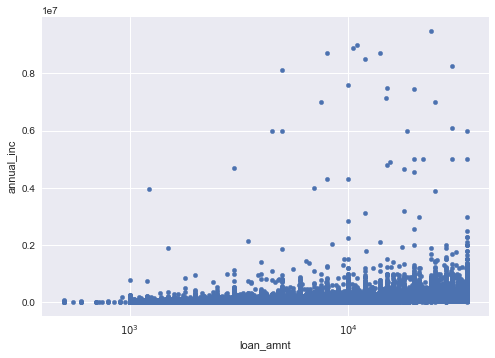

In [26]:
loandf.plot(x='loan_amnt', y='annual_inc', logx=True, logy=False, kind='scatter'
           #,ax=[1e2,1e5,1e5,1e7]
           )
# column='loan_amnt', by ='annual_inc',rot=90, figsize=(8,5) , fontsize=14)

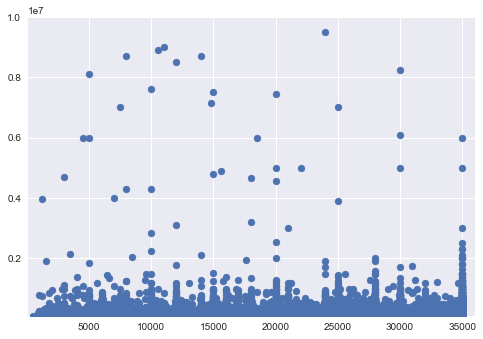

In [46]:
sc1 = plt.scatter(loandf.loan_amnt, loandf.annual_inc)
sc1ax = plt.gca()
sc1ax.axis([1e2,36e3,1e5,1e7])
plt.show()

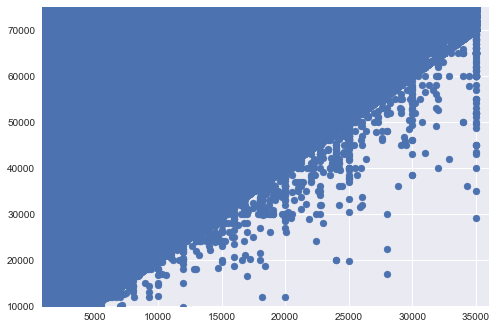

In [51]:
sc2 = plt.scatter(loandf.loan_amnt, loandf.annual_inc)
sc2ax = plt.gca()
sc2ax.axis([9e2,36e3,1e4,75e3])
plt.show()

In [21]:
loandf.annual_inc.max()

9500000.0

In [52]:
loandf.shape

(887383, 28)

In [66]:
loandf['log_ann_inc'] = loandf.annual_inc.apply(pd.np.log)

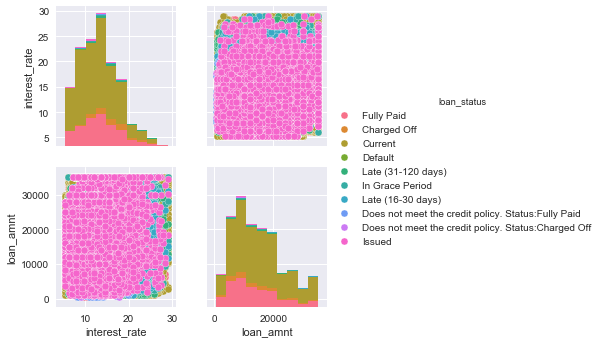

In [71]:
sns.pairplot(loandf[['interest_rate','loan_amnt','grade','loan_status']].dropna(),
             hue='loan_status')

In [73]:
print(loandf.installment.dtype)
loandf.installment.unique()

float64


array([ 162.87,   59.83,   84.33, ...,  685.27,  185.06,  237.86])

In [76]:
loandf.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', None], dtype=object)

In [77]:
loandf.delinq_2yrs.unique()

array([  0.,   2.,   3.,   1.,   4.,   6.,   5.,   8.,   7.,   9.,  11.,
        nan,  13.,  15.,  10.,  12.,  17.,  18.,  29.,  24.,  14.,  21.,
        22.,  19.,  16.,  30.,  26.,  20.,  27.,  39.])

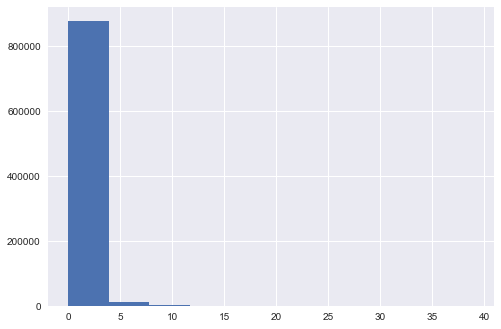

In [78]:
loandf.delinq_2yrs.hist()

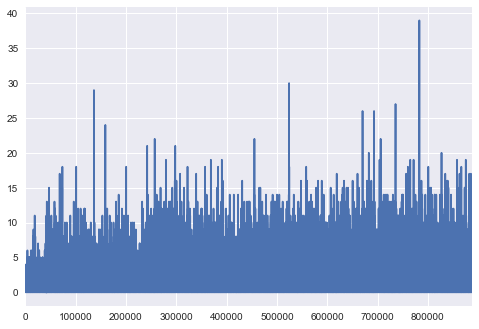

In [79]:
loandf.delinq_2yrs.plot()

In [92]:
loandf.delinq_2yrs.replace(to_replace=pd.np.nan,value=0, inplace=True)

In [93]:
loandf.delinq_2yrs.unique()

array([  0.,   2.,   3.,   1.,   4.,   6.,   5.,   8.,   7.,   9.,  11.,
        13.,  15.,  10.,  12.,  17.,  18.,  29.,  24.,  14.,  21.,  22.,
        19.,  16.,  30.,  26.,  20.,  27.,  39.])

In [94]:
loandf.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', None,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'], dtype=object)

In [95]:
loandf.dti.unique()

array([ 27.65,   1.  ,   8.72, ...,  45.77,  55.1 ,  59.19])

In [96]:
pd.crosstab(index=loandf['dti'], columns='count')

col_0    count
dti           
0.00       451
0.01        10
0.02        12
0.03         8
0.04         6
0.05         7
0.06         8
0.07        13
0.08        11
0.09         9
0.10         7
0.11        15
0.12        14
0.13        23
0.14        12
0.15        12
0.16        18
0.17        17
0.18        17
0.19         8
0.20        32
0.21        21
0.22        24
0.23        17
0.24        21
0.25        41
0.26        31
0.27        27
0.28        29
0.29        22
...        ...
59.19        1
59.26        2
60.08        1
61.21        1
63.64        1
64.50        1
64.99        1
67.50        1
68.30        1
68.41        1
69.35        1
71.40        1
71.82        1
72.30        1
74.48        1
77.06        1
83.40        1
83.64        1
89.83        1
90.00        1
100.09       1
104.00       1
120.66       1
125.25       1
136.97       1
137.40       1
380.53       1
672.52       1
1092.52      1
9999.00      2

[4086 rows x 1 columns]

In [99]:
zzz = []
for a in loandf.dti:
    zzz.append(a+1)

In [100]:
yyy = []
for inc in loandf.annual_inc:
    yyy.append(inc//12060)

In [101]:
set(yyy)

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 85.0,
 87.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 95.0,
 97.0,
 99.0,
 102.0,
 103.0,
 106.0,
 107.0,
 111.0,
 112.0,
 114.0,
 116.0,
 119.0,
 122.0,
 124.0,
 125.0,
 132.0,
 136.0,
 140.0,
 145.0,
 147.0,
 149.0,
 153.0,
 592.0,
 617.0,
 621.0,
 nan,
 nan,
 nan,
 157.0,
 nan,
 nan,
 161.0,
 165.0,
 169.0,
 174.0,
 177.0,
 186.0,
 190.0,
 207.0,
 211.0,
 236.0,
 248.0,
 258.0,
 265.0,
 323.0,
 328.0,
 331.0,
 356.0,
 3

In [102]:
loandf.term.unique()

array([' 36 months', ' 60 months', None], dtype=object)